# Inferential Statistics

Binomial Distribution Example

Question <br>
80% of all visitors to Lavista Museum end up buying souvenirs from the gift shop. On the coming Sunday, if a random sample of 10 visitors is picked:
1. Find the probability that every visitor will end up buying from the gift shop
2. Find the probability that a maximum of 7 visitors will buy souvenirs from the gift shop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
n = 10 
p = 0.80
k = np.arange(0,11)
print(k)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [4]:
from scipy.stats import binom

binomial = binom.pmf(k=k, n=n, p=p)
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

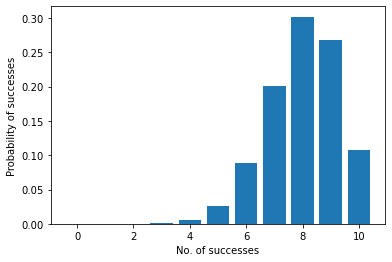

In [4]:
plt.bar(k, binomial)
plt.xlabel('No. of successes')
plt.ylabel('Probability of successes')
plt.show()

In [5]:
# probability that all 10 customers buy
binomial[10]

0.10737418240000005

In [6]:
# Cumulative Distribution Function
binom.cdf(k=7, n=n, p=p)

0.3222004736

Discrete Uniform Distribution Example- Bookseller.csv

Question <br>
Number of books sold by a bookseller per day is given in 'Bookseller.csv' <br>
X = number of books sold by a bookseller per day <br>
1. Find the probability that more than (or equal to) 96 books will be sold on a given day <br>
2. Find the probability that less than (or equal to) 92 books will be sold on a given day

In [9]:
book_count = pd.read_csv('C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\bookseller.csv')
book_count.head()

,S.No,Date,Number of Books Sold
0,1,01-01-2020,90
1,2,02-01-2020,100
2,3,03-01-2020,100
3,4,04-01-2020,97
4,5,05-01-2020,93


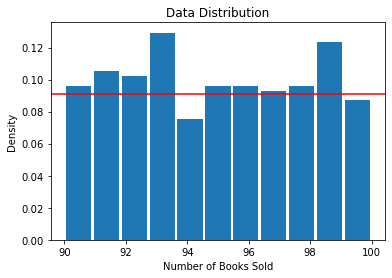

In [15]:
plt.hist(book_count['Number of Books Sold'], 11, rwidth=0.9, density=True)
plt.xlabel('Number of Books Sold')
plt.axhline(1/11, color='red') --corresponds to the uniform distribution
plt.ylabel('Density')
plt.title('Data Distribution')
plt.show()

In [17]:
from scipy.stats import uniform

k = np.arange(90,101)
probs = uniform.pdf(k, loc=90, scale=11)

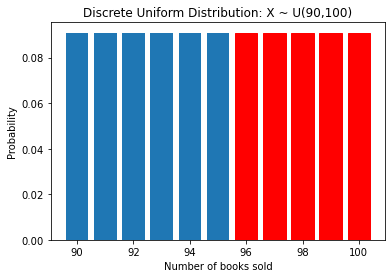

In [20]:
bar = plt.bar(k, probs)
plt.xlabel('Number of books sold')
plt.ylabel('Probability')
plt.title("Discrete Uniform Distribution: X ~ U(90,100)")
for i in range(6,11):
    bar[i].set_color('r')
plt.show()

In [22]:
1 - uniform.cdf(96, loc=90, scale=11)

0.4545454545454546

In [23]:
uniform.cdf(92, loc=90, scale=11)

0.18181818181818182

Continuous Uniform Distribution Example- debugging.csv

Question <br>
Amount of time a software engineer needs to fix a bug <br>
X = time needed to fix bugs <br>
1. Find the probability that a randomly selected software debugging requires less than 3 hours <br>
2. Find the probability that a randomly selected software debugging requires more than 2 hours <br>
3. Find the 50th percentile of the software debugging time

In [24]:
debugging = pd.read_csv('C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\debugging.csv')
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


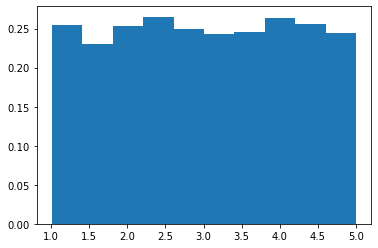

In [31]:
plt.hist(debugging['Time Taken to fix the bug'], 10, density=True)
plt.show()

In [28]:
k = np.arange(1,6)
probs = uniform.cdf(k, loc=1, scale=5)

In [33]:
uniform.cdf(3, loc=1, scale=4)

0.5

In [34]:
1 - uniform.cdf(2, loc=1, scale=4) 

0.75

In [35]:
uniform.ppf(q=0.5, loc=1, scale=4)

3.0

Normal Distribution Example

SAT scores of 1000 students <br>
1. Calculate the probability that a student will score less than 800 in the SAT exam <br>
2. Calculate the probability that a student will score more than 1300 in the SAT exam <br>
3. Calculate the minimum marks a student must score in order to secure 90th percentile <br>
4. Calculate the minimum marks a student must score to be in the top 5%

In [6]:
sat_score = pd.read_csv('C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\sat_score.csv')
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [7]:
from scipy.stats import norm

mu = sat_score['score'].mean()
sigma = sat_score['score'].std()

print('The estimated mean and standard deviation is', mu, sigma)

The estimated mean and standard deviation is 1007.46 204.42600713312467


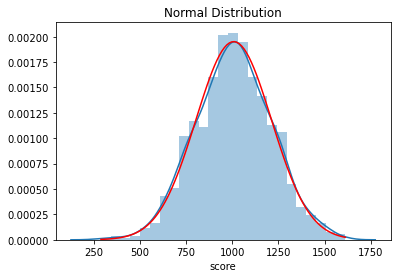

In [12]:
density = pd.DataFrame()
# print(density)

density['x'] = np.linspace(
sat_score['score'].min() - 0.01, sat_score['score'].max() + 0.01, 100
)

density['pdf'] = norm.pdf(density['x'], mu, sigma)

fig, ax = plt.subplots()

sns.distplot(sat_score['score'], ax=ax, kde=True)
ax.plot(density['x'], density['pdf'], color='red')
plt.title('Normal Distribution')
plt.show()

In [14]:
# Calculate the probability that a student will score less than 800 in the SAT exam
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(prob_less_than_800)

0.15509068891539868


In [15]:
# Calculate the probability that a student will score more than 1300 in the SAT exam
prob_more_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(prob_more_than_1300)

0.07621063272885586


In [16]:
# Calculate the minimum marks a student must score in order to secure 90th percentile
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print(score_90th_percentile)

1269.4424694794875


In [17]:
# Calculate the minimum marks a student must score to be in the top 5%
score_top_5_percent = norm.ppf(0.95, mu, sigma)
print(score_top_5_percent)

1343.7108592761276


In [18]:
prob_less_than_750 = norm.cdf(750, mu, sigma)
print(prob_less_than_750)

0.10393774696096786


Central Limit Theorem

What the Central Limit Theorem looks like for a Uniform Distribution

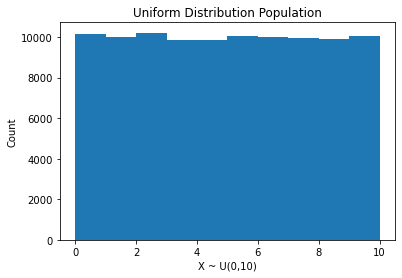

In [23]:
from scipy.stats import uniform
# np.random.seed(1) --this is to simluate the same random population everytime
np.random.seed(1)
uniform_pop = uniform.rvs(0,10, size=100000)

# visualizing the uniform distribution
plt.hist(uniform_pop)
plt.title('Uniform Distribution Population')
plt.xlabel('X ~ U(0,10)')
plt.ylabel('Count')
plt.show()

Sampling Distribution from this population (sample size = 5, number of samples = 500) <br>
Draw a sample of size 5 <br>
Get the mean of these 5 observations <br>
Repeat this 500 times <br>

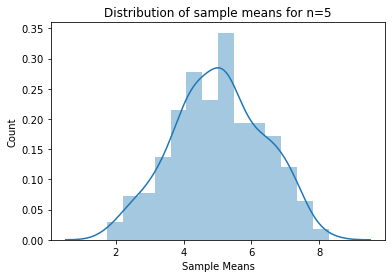

In [29]:
np.random.seed(1)
n = 5
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(uniform_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=5')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()

# Sampling distribution is not uniform, but the CLT is not in full force because of the small sample size

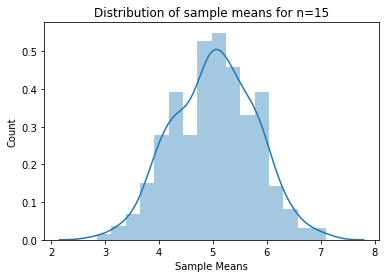

In [30]:
# Repeating the experiment with sample size n = 15
np.random.seed(1)
n = 15
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(uniform_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=15')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()


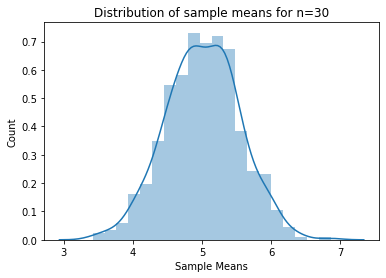

In [31]:
# Repeating the experiment with sample size n = 30
np.random.seed(1)
n = 30
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(uniform_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=30')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()


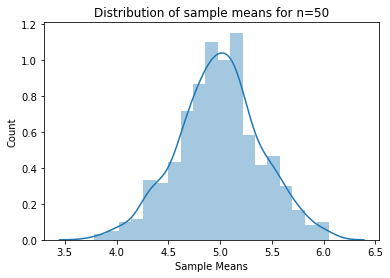

In [32]:
# Repeating the experiment with sample size n = 50
np.random.seed(1)
n = 50
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(uniform_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=50')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()


What the Central Limit Theorem looks like for an Exponential Distribution

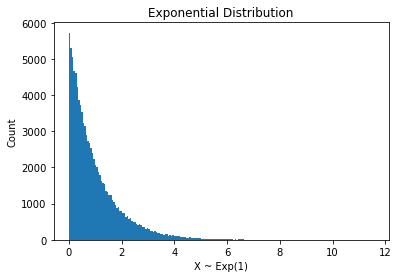

In [34]:
from scipy.stats import expon

np.random.seed(1)
exp_pop = expon.rvs(size = 100000)

plt.hist(exp_pop, 200)
plt.title('Exponential Distribution')
plt.xlabel('X ~ Exp(1)')
plt.ylabel('Count')
plt.show()


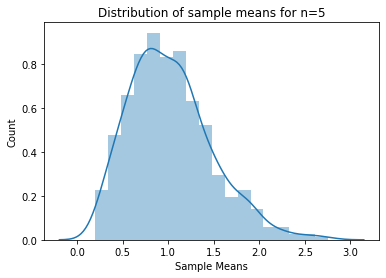

In [36]:
np.random.seed(1)
n = 5
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(exp_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=5')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()

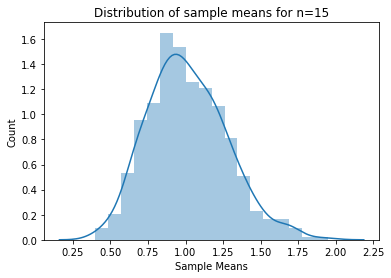

In [37]:
# Repeating the experiment with sample size n = 15
np.random.seed(1)
n = 15
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(exp_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=15')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()

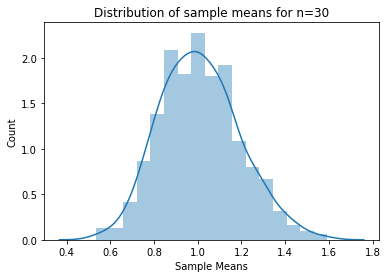

In [38]:
# Repeating the experiment with sample size n = 30
np.random.seed(1)
n = 30
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(exp_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=30')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()

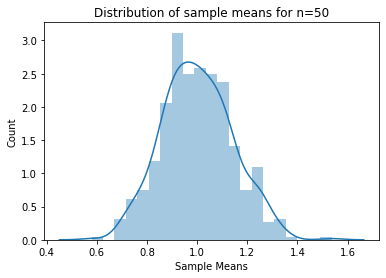

In [39]:
# Repeating the experiment with sample size n = 50
np.random.seed(1)
n = 50
sample_means = []

for j in range(500):
#     selecting 5 observations randomly from the sample
    sample = np.random.choice(exp_pop, size=n)
#     calculating the mean of those 5 observations
    sample_mean = np.mean(sample)
#     appending these means to the list sample_means
    sample_means.append(sample_mean)

sns.distplot(sample_means, kde=True)
plt.title('Distribution of sample means for n=50')
plt.xlabel('Sample Means')
plt.ylabel('Count')
plt.show()

Point Estimation

Damages (in terms of thousands of $) from 10 wildfire incidents <br>
120, 55, 60, 10, 8, 150, 44, 58, 62, 123 <br>
What is the estimate of the average amount of damage <br>

In [2]:
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])
x_bar = np.mean(sample)
x_bar

# 69K is the point estimate of the damage caused by a wildfire
# Point estimates are not useful unless we account for the uncertainty around the estimate- this is when confidence intervals come into play

69.0

Caffeine content in a random sample of 50 cups of black coffee dispensed by a new coffee machine <br>
Mean of the sample = 110 mg <br>
Standard deviation from all machines of the manufacturer = 7 mg <br>
Construct a 95% confidence interval for mu, the mean caffeine content for cups dispensed by the machine <br>

In [3]:
from scipy.stats import norm

# set the values of sample mean and sigma
x_bar, sigma = 110, 7

# set the value of the sample size
n = 50

# standard error around x_bar = sigma/sqrt(n)

# construct the confidence interval
np.round(norm.interval(0.95, loc= x_bar, scale= sigma/np.sqrt(n)), 2)

# This takes into account the variability in the data
# variability in each observation = sigma
# variabliliy around x_bar = sigma/sqrt(n)
# standard deviation applies to each point in the dataset
# standard error applies to the average of the points

# Insight: with 95% confidence, the population mean lies between 108.06 and 111.94

array([108.06, 111.94])

Above example is when we know the population standard deviation. But that's almost never the case. <br>
When we do not know the population standard deviation, it can be estimated from the sample. <br>
In this case, the sample mean follows Student's t distribution with n-1 degrees of freedom. <br>
t distribution is similar to the normal distribution for very large degrees of freedom

In [4]:
# same example as above assuming that 7 is the sample standard deviation
from scipy.stats import t

x_bar, s = 110, 7
n = 50
k = n-1

np.round(t.interval(0.95, df=k, loc= x_bar, scale= s/np.sqrt(n)), 2)
# The intervals are the same as before - because sample size is greater than 30

array([108.01, 111.99])

A random sample of 100 men is taken and their mean height is found to be 180 cm. <br>
The population variance is 36 cm2. <br>
Find the 95% confidence interval for the mean height of the population(μ).

In [6]:
n = 100
x_bar = 180
sigma = 6
np.round(norm.interval(0.95, loc= x_bar, scale= sigma/np.sqrt(n)), 2)

array([178.82, 181.18])

A landlord wants to rent an unfurnished one-bedroom apartment in Chicago. <br>
The mean monthly rent for a random sample of 100 apartments advertised on a website that lists apartments in Chicago for rent is $1000. <br>
Assume a population standard deviation of $200. <br>
Construct a 95% confidence interval for the mean rent.

In [7]:
n = 100
x_bar = 1000
sigma = 200
np.round(norm.interval(0.95, loc= x_bar, scale= sigma/np.sqrt(n)), 2)

array([ 960.8, 1039.2])

A survey of females aged 16-60 years was conducted by the Department of Population Censuses (DPC), it was found that a sample of fifty female students has a mean height of 160.9 cm with a standard deviation of 6 cm. <br>
Determine the confidence interval of height with a confidence level of 95% and conclude whether their heights are typical of the general population?

In [8]:
n = 50
x_bar = 160.9
s = 6
k = n-1

np.round(t.interval(0.95, df=k, loc= x_bar, scale= s/np.sqrt(n)), 2)

array([159.19, 162.61])